In [1]:
# Importing the important Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the Dataset.
df1 = pd.read_excel("") # Pursposefully left empty as you have to enter the the path of the your dataset
df1.head()

,Pressure (Bar),Tsat,Vf,Vg,Uf,Ufg,Ug,Hf,Hfg,Hg,Sf,Sfg,Sg
0,0.006117,0.01,0.001000,206.000,0.000,2374.9,2374.9,0.001,2500.9,2500.9,0.0000,9.1556,9.1556
1,0.008725,5.00,0.001000,147.030,21.019,2360.8,2381.8,21.020,2489.1,2510.1,0.0763,8.9487,9.0249
2,0.010000,6.97,0.001000,129.190,29.302,2355.2,2384.5,29.303,2484.4,2513.7,0.1059,8.8690,8.9749
3,0.012281,10.00,0.001000,106.320,42.020,2346.6,2388.7,42.022,2477.2,2519.2,0.1511,8.7488,8.8999
4,0.015000,13.02,0.001001,87.964,54.686,2338.1,2392.8,54.688,2470.1,2524.7,0.1956,8.6314,8.8270


In [3]:
# Dropping the Internal energy as we do not generally need it but one can follow the same steps given down for Internal energy.
df2 = df1.drop(['Uf', 'Ug', 'Ufg'], axis = 'columns')
df2.head()

,Pressure (Bar),Tsat,Vf,Vg,Hf,Hfg,Hg,Sf,Sfg,Sg
0,0.006117,0.01,0.001000,206.000,0.001,2500.9,2500.9,0.0000,9.1556,9.1556
1,0.008725,5.00,0.001000,147.030,21.020,2489.1,2510.1,0.0763,8.9487,9.0249
2,0.010000,6.97,0.001000,129.190,29.303,2484.4,2513.7,0.1059,8.8690,8.9749
3,0.012281,10.00,0.001000,106.320,42.022,2477.2,2519.2,0.1511,8.7488,8.8999
4,0.015000,13.02,0.001001,87.964,54.688,2470.1,2524.7,0.1956,8.6314,8.8270


In [4]:
# Checking for Null Values
df2.isnull().sum()

Pressure (Bar)    0
Tsat              0
Vf                0
Vg                0
Hf                0
Hfg               0
Hg                0
Sf                0
Sfg               0
Sg                0
dtype: int64

In [5]:
# As there are only 149 entries to leverage the maximum out of the given dataset WE DO NOT perform a train, test split.
df2.shape

(149, 10)

In [6]:
# Here we assign the dependent variable i.e Hf, Hg, Hfg, Sf, Sg, Sfg
# Pressure is the independant variable i.e x
# Everything needs to be reshaped too
y_Hf = df2['Hf'].values
y_Hg = df2['Hg'].values
y_Hfg = df2['Hfg'].values
y_Hf = y_Hf.reshape(-1, 1)
y_Hg = y_Hg.reshape(-1, 1)
y_Hfg = y_Hfg.reshape(-1, 1)

y_Sf = df2['Sf'].values
y_Sg = df2['Sg'].values
y_Sfg = df2['Sfg'].values
y_Sf = y_Sf.reshape(-1, 1)
y_Sg = y_Sg.reshape(-1, 1)
y_Sfg = y_Sfg.reshape(-1, 1)

T_sat = df2.iloc[:,1].values
y_Hfg = y_Hfg.reshape(-1, 1)

x = T_sat
x = x.reshape(-1, 1)

x_p = df2['Pressure (Bar)'].values
x_P = x.reshape(-1, 1)


name = []
value = []
acc = []

In [7]:
# Entert the Pressure and the temperature values
key1 = input("Is the pressure known (y/n)")
key2 = input("Is the Temperature known (y/n)")
if key1 == "y":
    pressure = float(input("Enter the pressure in bar "))
if key2 == "y":    
    temperature = float(input("Enter the Temperature in °C "))

Is the pressure known (y/n)n
Is the Temperature known (y/n)y
Enter the Temperature in °C 163.8


In [8]:
# We perform Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Importing r2 score method to check accuracy
from sklearn.metrics import r2_score

# List to check the accuracy score 
score = []
score_max = -1


In [9]:
## We use this (if just pressure is given) to find temperature
if key1 == "y" and key2 == "n":
    score = []
    score_max = -1
    np.set_printoptions(formatter={'float_kind':'{:f}'.format})

    for i in range(10):   
        poly_reg = PolynomialFeatures(degree = i)
        x_poly = poly_reg.fit_transform(x)
        Regressor_p = LinearRegression()
        Regressor_p.fit(x_poly, x_p)
        y_pred = Regressor_p.predict(x_poly).reshape(len(Regressor_p.predict(x_poly)), 1)
        if (r2_score(y_pred, x_p) > score_max):                # In this Line we compare for degree = 1 to 10 and then check the 
            score_max = r2_score(y_pred, x_p)                  # accuracy. we then store the y_max in the case where the accuracy is 
            y_max = y_pred                                       # maximum. (Same for all the below case)
        score.append(r2_score(y_pred, x_p)) 
    print(np.array(score).reshape(len(np.array(score)),1))
    print(" ")
    print(score_max)

    print(Regressor_p.predict(poly_reg.fit_transform([[]])))
    plt.scatter(x, y_max, color = 'red' )
    plt.plot(x, x_p, color = 'blue' )

# P.S:- ignore this cell for now working in it

[[0.        ]
 [0.86276788]
 [0.96495501]
 [0.98535345]
 [0.99147409]
 [0.9945182 ]
 [0.99626299]
 [0.99702063]
 [0.99697464]
 [0.99600076]]
 
0.9970206284360734


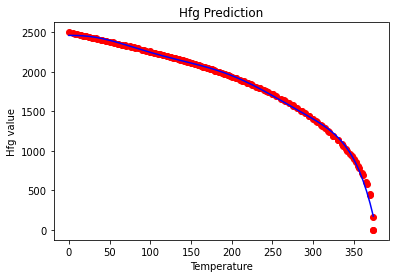

 
[[2049.54792785]]


In [10]:
# For Hfg
for i in range(10):   
    poly_reg = PolynomialFeatures(degree = i)
    x_poly = poly_reg.fit_transform(x)
    Regressor_Hfg = LinearRegression()
    Regressor_Hfg.fit(x_poly, y_Hfg)
    y_pred = Regressor_Hfg.predict(x_poly).reshape(len(Regressor_Hfg.predict(x_poly)), 1)
    if (r2_score(y_pred, y_Hfg) > score_max):                # In this Line we compare for degree = 1 to 10 and then check the 
        score_max = r2_score(y_pred, y_Hfg)                  # accuracy. we then store the y_max in the case where the accuracy is 
        y_max = y_pred                                       # maximum. (Same for all the below case)
    score.append(r2_score(y_pred, y_Hfg)) 
print(np.array(score).reshape(len(np.array(score)),1))
print(" ")
print(score_max)

acc.append(score_max)

plt.scatter(x, y_Hfg, color = 'red')
plt.plot(x, y_max, color = 'blue')
plt.title('Hfg Prediction')
plt.xlabel('Temperature')
plt.ylabel('Hfg value')
plt.show()

print(" ")
print(Regressor_Hfg.predict(poly_reg.fit_transform([[temperature]])))
value.append(Regressor_Hfg.predict(poly_reg.fit_transform([[temperature]])))
name.append("Hfg")

[[-21775823332478305386496528482304.000000]
 [0.984960]
 [0.994476]
 [0.997394]
 [0.998423]
 [0.998949]
 [0.999263]
 [0.999217]
 [0.995287]
 [0.989785]]
 
0.9992625392153833


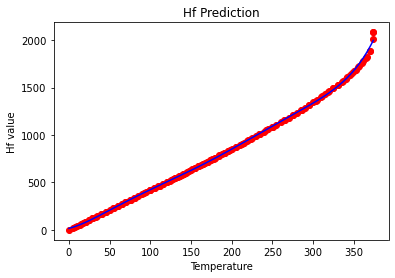

 
[[720.092141]]


In [11]:
# For Hf
score = []
score_max_Hf = -1
for i in range(10):   
    poly_reg = PolynomialFeatures(degree = i)
    x_poly = poly_reg.fit_transform(x)
    Regressor_Hf = LinearRegression()
    Regressor_Hf.fit(x_poly, y_Hf)
    y_pred = Regressor_Hf.predict(x_poly).reshape(len(Regressor_Hf.predict(x_poly)), 1)
    if (r2_score(y_pred, y_Hf) > score_max_Hf):
        score_max_Hf = r2_score(y_pred, y_Hf)
        y_max_Hf = y_pred
    score.append(r2_score(y_pred, y_Hf))

array = np.array(score).reshape(len(np.array(score)),1)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(array)
print(" ")
print(score_max_Hf)

acc.append(score_max_Hf)

plt.scatter(x, y_Hf, color = 'red')
plt.plot(x, y_max_Hf, color = 'blue')
plt.title('Hf Prediction')
plt.xlabel('Temperature')
plt.ylabel('Hf value')
plt.show()

print(" ")

print(Regressor_Hf.predict(poly_reg.fit_transform([[temperature]])))
value.append(Regressor_Hf.predict(poly_reg.fit_transform([[temperature]]))) 
name.append("Hf")

[[-84823217491766848644678942720.000000]
 [-1207.087781]
 [0.684851]
 [0.894369]
 [0.942130]
 [0.964300]
 [0.976177]
 [0.983365]
 [0.960946]
 [0.943860]]
 
0.9833651658843198


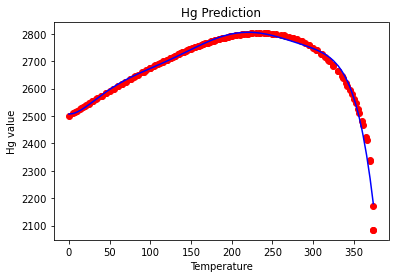

 
[[2769.647601]]


In [12]:
# For Hg 
score = []
score_max_Hg = -1
for i in range(10):   
    poly_reg = PolynomialFeatures(degree = i)
    x_poly = poly_reg.fit_transform(x)
    Regressor_Hg = LinearRegression()
    Regressor_Hg.fit(x_poly, y_Hg)
    y_pred = Regressor_Hg.predict(x_poly).reshape(len(Regressor_Hg.predict(x_poly)), 1)
    if (r2_score(y_pred, y_Hg) > score_max_Hg):
        score_max_Hg = r2_score(y_pred, y_Hg)
        y_max_Hg = y_pred
    score.append(r2_score(y_pred, y_Hg))

array = np.array(score).reshape(len(np.array(score)),1)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(array)
print(" ")
print(score_max_Hg)

acc.append(score_max_Hg)

plt.scatter(x, y_Hg, color = 'red')
plt.plot(x, y_max_Hg, color = 'blue')
plt.title('Hg Prediction')
plt.xlabel('Temperature')
plt.ylabel('Hg value')
plt.show()

print(" ")

print(Regressor_Hg.predict(poly_reg.fit_transform([[temperature]])))
value.append(Regressor_Hg.predict(poly_reg.fit_transform([[temperature]])))
name.append("Hg")

[0.0, 0.985068228386481, 0.990685465256395, 0.9982379051491638, 0.9986484312895607, 0.9991795482774816, 0.9994265725859527, 0.998714571622601, 0.9816063814586213, 0.9642747056309054]
 
0.9994265725859527


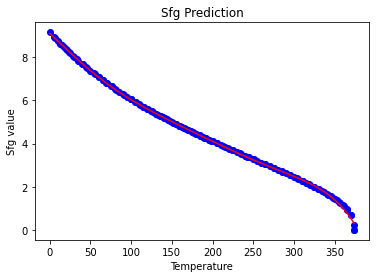

[[4.534436]]


In [13]:
# For Sfg
score_max = 0
score = []
for i in range(10):  
    poly_reg = PolynomialFeatures(degree = i)
    x_poly = poly_reg.fit_transform(x)
    Regressor_Sfg = LinearRegression()
    Regressor_Sfg.fit(x_poly, y_Sfg)
    y_pred = Regressor_Sfg.predict(x_poly).reshape(len(Regressor_Sfg.predict(x_poly)), 1)
    if (r2_score(y_pred, y_Sfg) > score_max):
        score_max = r2_score(y_pred, y_Sfg)
        y_max = y_pred
    score.append(r2_score(y_pred, y_Sfg))


print(score)
print(" ")
print(score_max)

acc.append(score_max)

plt.plot(x, y_max, color = 'red')
plt.scatter(x, y_Sfg, color = 'blue')
plt.title('Sfg Prediction')
plt.xlabel('Temperature')
plt.ylabel('Sfg value')
plt.show()

print(Regressor_Sfg.predict(poly_reg.fit_transform([[temperature]])))
value.append(Regressor_Sfg.predict(poly_reg.fit_transform([[temperature]]))) 
name.append("Sfg")

[0.0, 0.9680727713485469, 0.981878354937052, 0.9975239825748325, 0.997962126428897, 0.998835191947633, 0.9991944625501935, 0.9980059694104142, 0.9726078497525266, 0.9487823632632235]
 
0.9991944625501935


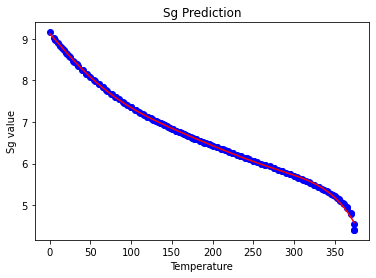

[[6.599838]]


In [14]:
# For Sg
score_max = 0
score = []
for i in range(10):  
    poly_reg = PolynomialFeatures(degree = i)
    x_poly = poly_reg.fit_transform(x)
    Regressor_Sg = LinearRegression()
    Regressor_Sg.fit(x_poly, y_Sg)
    y_pred = Regressor_Sg.predict(x_poly).reshape(len(Regressor_Sg.predict(x_poly)), 1)
    if (r2_score(y_pred, y_Sg) > score_max):
        score_max = r2_score(y_pred, y_Sg)
        y_max = y_pred
    score.append(r2_score(y_pred, y_Sg))


print(score)
print(" ")
print(score_max)

acc.append(score_max)

plt.plot(x, y_max, color = 'red')
plt.scatter(x, y_Sg, color = 'blue')
plt.title('Sg Prediction')
plt.xlabel('Temperature')
plt.ylabel('Sg value')
plt.show()

print(Regressor_Sg.predict(poly_reg.fit_transform([[temperature]])))
value.append(Regressor_Sg.predict(poly_reg.fit_transform([[temperature]]))) 
name.append("Sg")

[-1.6160240102760353e+30, 0.9950623506220823, 0.9962748166294518, 0.9987963688359748, 0.9991789606577589, 0.9994580720648135, 0.999612505056598, 0.999253078599403, 0.9885973920023546, 0.976494742551445]
 
0.999612505056598


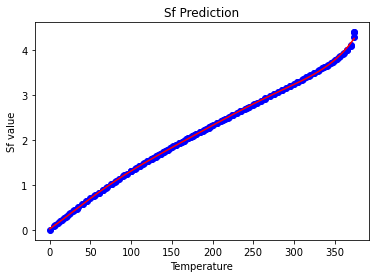

[[2.065413]]


In [15]:
# For Sf
score_max = 0
score = []
for i in range(10):  
    poly_reg = PolynomialFeatures(degree = i)
    x_poly = poly_reg.fit_transform(x)
    Regressor_Sf = LinearRegression()
    Regressor_Sf.fit(x_poly, y_Sf)
    y_pred = Regressor_Sf.predict(x_poly).reshape(len(Regressor_Sf.predict(x_poly)), 1)
    if (r2_score(y_pred, y_Sf) > score_max):
        score_max = r2_score(y_pred, y_Sf)
        y_max = y_pred
    score.append(r2_score(y_pred, y_Sf))


print(score)
print(" ")
print(score_max)

acc.append(score_max)

plt.plot(x, y_max, color = 'red')
plt.scatter(x, y_Sf, color = 'blue')
plt.title('Sf Prediction')
plt.xlabel('Temperature')
plt.ylabel('Sf value')
plt.show()

print(Regressor_Sf.predict(poly_reg.fit_transform([[temperature]])))
value.append( Regressor_Sf.predict(poly_reg.fit_transform([[temperature]])))
name.append("Sf")

In [16]:
# Printing the final values

print("name         values")
for i in range(len(value)):
    print( name[i] +'\t'+str(value[i]))
acc = np.array(acc)
print(" ")
print("The total accuracy of the model is " + str(np.mean(acc)))

[[2769.647601]]
name         values
Hfg	[[2049.547928]]
Hf	[[720.092141]]
Hg	[[2769.647601]]
Sfg	[[4.534436]]
Sg	[[6.599838]]
Sf	[[2.065413]]
 
The total accuracy of the model is 0.9963136456214201
